In [ ]:
 #importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
ads_df = pd.read_csv('/content/Social_Network_Ads.csv')
ads_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#calculating total number of rows and columns
ads_df.shape

(400, 5)

# **EDA**

In [ ]:
#checking null values in the dataset
ads_df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**None of the columns has the null values**

In [ ]:
#Checking any duplicated values in the dataset
ads_df.duplicated().sum()

0

**None of the rows has duplicate values**

In [ ]:
#Dropping unnecessary columns
#In our case 'User ID' is an unnecessary column
ads_df.drop(columns=['User ID'],inplace=True)

In [ ]:
#checking if the particular column has been removed or not
ads_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
#calculating the number of rows and columns to verify if column is reduced or not
ads_df.shape

(400, 4)

In [ ]:
#calculating total numbe of female and males in the data
ads_df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<Axes: >

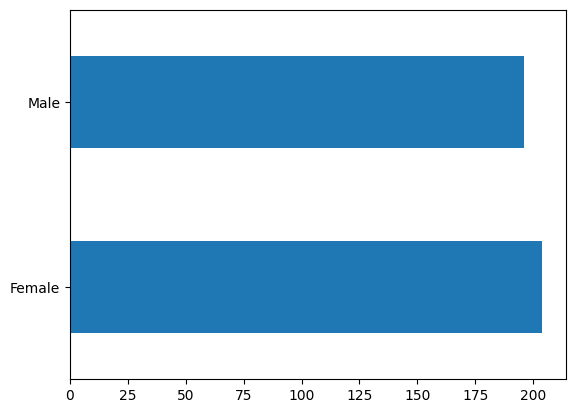

In [ ]:
#plotting in a graph total the above count
ads_df.Gender.value_counts().plot(kind='barh') # kind = 'bar' represents to plot the bar graph and 'barh' reresents to plot the horizontal bar graph

**Number of females is greater than number of males and difference is not that big**

In [ ]:
#Counting the age in a datasets
ads_df["Age"].value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

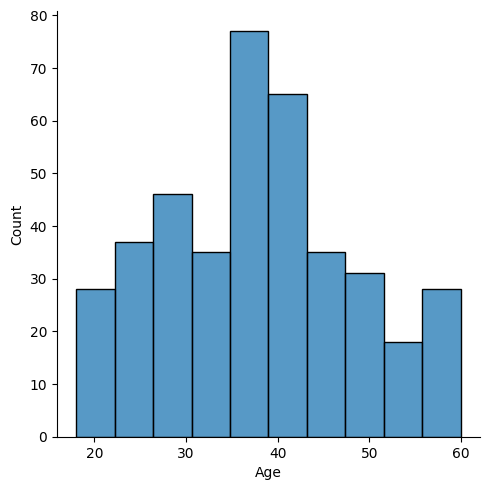

In [ ]:
#plotting the age count in a distribution graph
sns.displot(ads_df['Age'])

In [ ]:
#describing age
ads_df['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

**Age is normally distributed around 37**

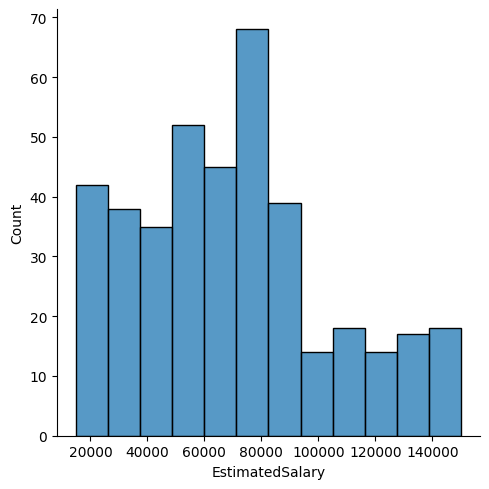

In [ ]:
#Plotting Estimated Salary
sns.displot(ads_df['EstimatedSalary'])

In [ ]:
#describing salary
ads_df["EstimatedSalary"].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

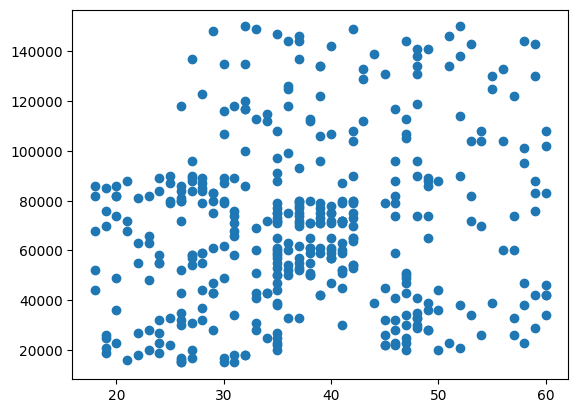

In [ ]:
#finding the relation between age and EstimatedSalary
plt.scatter(x='Age',y='EstimatedSalary',data=ads_df)

**As we can see there is no corelation between age and estimated salary**

<Axes: xlabel='Age', ylabel='Gender'>

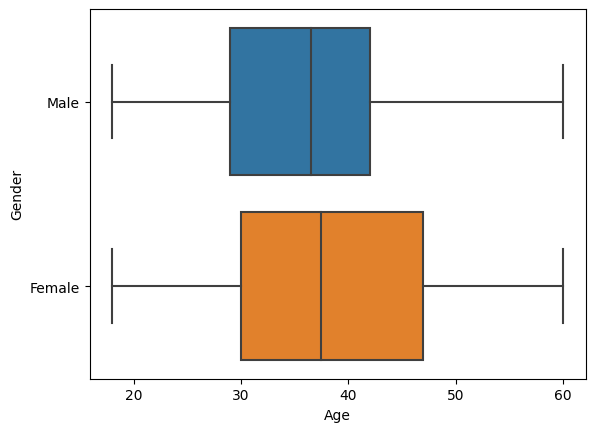

In [ ]:
#finding the relation between age and Gender
sns.boxplot(x='Age',y='Gender',data=ads_df)

**Females of older age are more**

<Axes: xlabel='EstimatedSalary', ylabel='Gender'>

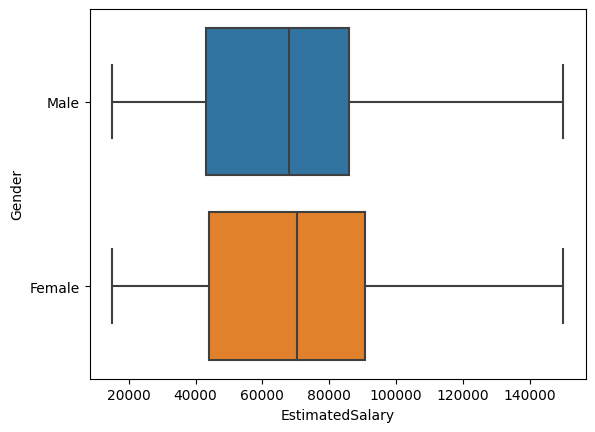

In [ ]:
#finding the relation between Salary and Gender
sns.boxplot(x='EstimatedSalary',y='Gender',data=ads_df)

**Estimated Salary of males and females is approximately same**

<Axes: xlabel='Age', ylabel='Gender'>

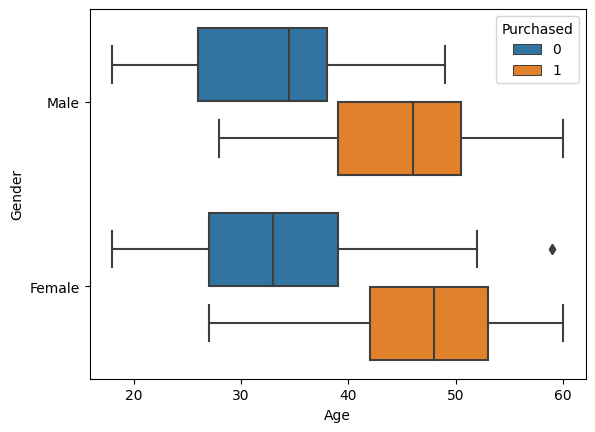

In [ ]:
#finding the relation between age and Gender based on purchased
sns.boxplot(x='Age',y='Gender',data=ads_df, hue='Purchased')

**It can be seen that older age of males and females are more probable to purchase than younger ones**

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

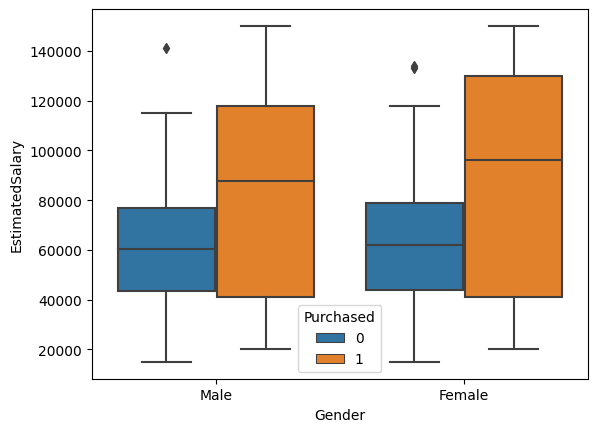

In [ ]:
#finding relation between Estimated Salary and Gender based on purchased
sns.boxplot(x='Gender',y='EstimatedSalary',data=ads_df, hue='Purchased')

**EstimatedSalary Mean and median of females are greater than men and people with high salary most probable to purchase**

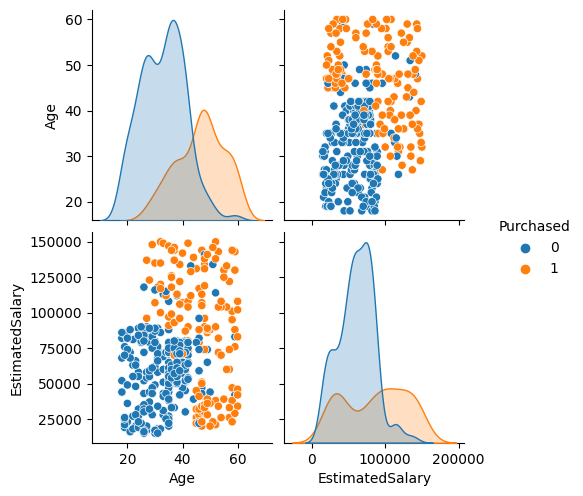

In [ ]:
#Multivariate Analysis
sns.pairplot(ads_df, hue="Purchased")

# Modelling

In [ ]:
#importing packages for modelling and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Getting the information about ads_df dataframe
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
#feature variable or independent variable
x = ads_df.iloc[:,:-1]
x

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [ ]:
#target variable
y = ads_df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [ ]:
#checking the shape of x and y
print('The shape of feature variable x =',x.shape)
print('The shape of target variable y =',y.shape)

The shape of feature variable x = (400, 3)
The shape of target variable y = (400,)


In [ ]:
#Encoding Categorical data i.e. Gender
le = LabelEncoder()
x['Gender']=le.fit_transform(x.iloc[:,0])

In [ ]:
#Getting the info after encoding Gender column
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [ ]:
#splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
#checking the shape of x_train, y_train, x_test, y_test
print('The shape of x_train =',x_train.shape)
print('The shape of y_train =',y_train.shape)
print('The shape of x_test =',x_test.shape)
print('The shape of y_test =',y_test.shape)

The shape of x_train = (320, 3)
The shape of y_train = (320,)
The shape of x_test = (80, 3)
The shape of y_test = (80,)


In [ ]:
x_train.tail()

,Gender,Age,EstimatedSalary
71,0,24,27000
106,0,26,35000
270,0,43,133000
348,1,39,77000
102,0,32,86000


In [ ]:
x_test.tail()

,Gender,Age,EstimatedSalary
246,0,35,50000
227,1,56,133000
369,0,54,26000
176,0,35,47000
289,0,37,78000


<Axes: xlabel='Age', ylabel='Density'>

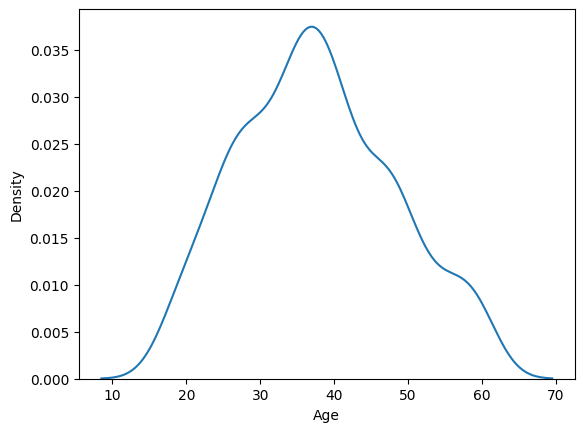

In [ ]:
#Feature Scaling
sns.kdeplot(ads_df['Age'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

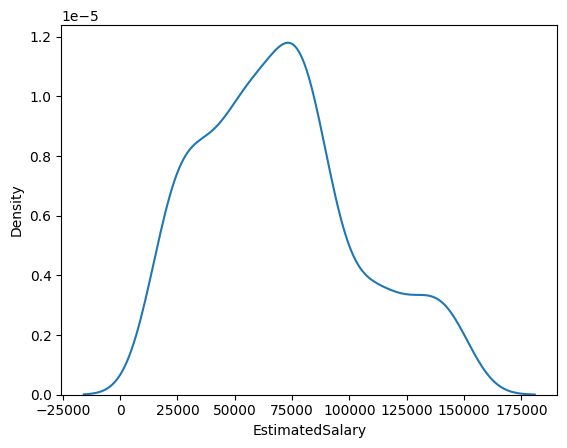

In [ ]:
#Feature Scaling
sns.kdeplot(ads_df['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='Density'>

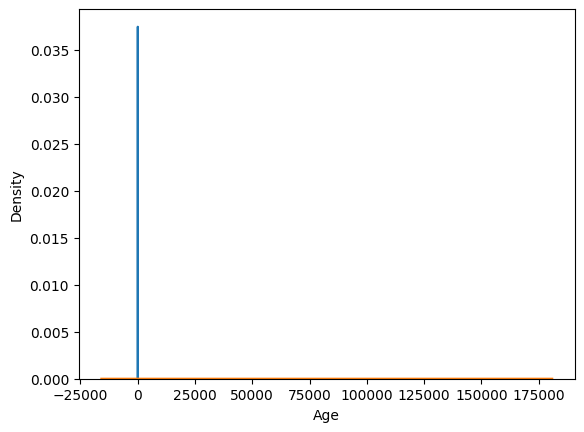

In [ ]:
sns.kdeplot(ads_df['Age'])
sns.kdeplot(ads_df['EstimatedSalary'])

In [ ]:
x_train.describe()

,Gender,Age,EstimatedSalary
count,320.000000,320.000000,320.00000
mean,0.500000,37.871875,70281.25000
std,0.500783,10.207525,34430.55286
min,0.000000,18.000000,15000.00000
25%,0.000000,30.000000,43000.00000
50%,0.500000,37.000000,71000.00000
75%,1.000000,45.000000,88000.00000
max,1.000000,60.000000,150000.00000


**As we can see there is a huge difference between minimum and maximum values**

In [ ]:
x_test.describe()

,Gender,Age,EstimatedSalary
count,80.000000,80.000000,80.000000
mean,0.450000,36.787500,67587.500000
std,0.500633,11.547035,32850.136793
min,0.000000,18.000000,19000.000000
25%,0.000000,28.000000,42750.000000
50%,0.000000,35.500000,65000.000000
75%,1.000000,47.000000,83500.000000
max,1.000000,60.000000,144000.000000


**Normalising the data**

In [ ]:
#Feature Scaling -> method to normalise the data
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train)
x_train.describe()

,0,1,2
count,320.000000,3.200000e+02,3.200000e+02
mean,0.000000,-2.775558e-16,1.110223e-17
std,1.001566,1.001566e+00,1.001566e+00
min,-1.000000,-1.949836e+00,-1.608102e+00
25%,-1.000000,-7.723913e-01,-7.935968e-01
50%,0.000000,-8.554870e-02,2.090805e-02
75%,1.000000,6.994143e-01,5.154289e-01
max,1.000000,2.171220e+00,2.318975e+00


In [ ]:
x_test = pd.DataFrame(x_test)
x_test.describe()

,0,1,2
count,80.000000,80.000000,80.000000
mean,-0.100000,-0.106399,-0.078360
std,1.001265,1.132999,0.955593
min,-1.000000,-1.949836,-1.491744
25%,-1.000000,-0.968632,-0.800869
50%,-1.000000,-0.232729,-0.153629
75%,1.000000,0.895655,0.384526
max,1.000000,2.171220,2.144439


# **Logistic Regression**

In [ ]:
#Building the model
lr_model = LogisticRegression()
#Training the model
lr_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Calculating the training score of the model
lr_training_score = lr_model.score(x_train, y_train)*100
print('Training Score of Logistic Regression Model =',lr_training_score,'%')

Training Score of Logistic Regression Model = 81.5625 %


**Training Score of Logistic Regression Model = 81.5625%**

In [ ]:
#Testing the model
y_pred_lr = lr_model.predict(x_test)
y_pred_lr

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
#Calculating the testing score
lr_testing_score = lr_model.score(x_test,y_test)*100
print('Testing Score of Logistic Regression =',lr_testing_score,'%')

Testing Score of Logistic Regression = 88.75 %


**Testing Score of Logistic Regression = 88.75%**

In [ ]:
#Calculating the Accuracy of the model
lr_accuracy = accuracy_score(y_test,y_pred_lr)*100
print('The accuracy of Logistic Regression =',lr_accuracy,'%')

The accuracy of Logistic Regression = 88.75 %


**The accuracy of Losgistic Regression = 88.75%**

In [ ]:
#Calculating Error in the model
lr_mse = mean_squared_error(y_test,y_pred_lr)*100
print('Error in the Logistic Regression Model =',lr_mse,'%')

Error in the Logistic Regression Model = 11.25 %


**Error in the Logistic Regression Model = 11.25 %**

# **SVM MODEL**


In [ ]:
#Building the model
svc_model = SVC()
#Training the model
svc_model.fit(x_train,y_train)

SVC()

In [ ]:
#Calculating the training score of the model
svc_training_score = svc_model.score(x_train, y_train)*100
print('Training Score of SVC Model =',svc_training_score,'%')

Training Score of SVC Model = 91.25 %


**Training Score of SVC Model = 91.25%**

In [ ]:
#Testing the model
y_pred_svc = svc_model.predict(x_test)
y_pred_svc

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
#Calculating the testing score
svc_testing_score = svc_model.score(x_test, y_test)*100
print('Testing Score of SVC Model =',svc_testing_score,'%')

Testing Score of SVC Model = 92.5 %


**Testing Score of SVC Model = 92.5%**

In [ ]:
#Calculating Overall Accuracy score
svc_acc_score = accuracy_score(y_test,y_pred_svc)*100
print('Accuracy of the SVC model =',svc_acc_score,'%')

Accuracy of the SVC model = 92.5 %


**Accuracy of the SVC model = 92.5%**

In [ ]:
#Calculating Mean Squared Error
svc_mse = mean_squared_error(y_test,y_pred_svc)*100
print('Error in the SVC model =',svc_mse,'%')

Error in the SVC model = 7.5 %


**Error in the SVC model = 7.5%**

# **KNN MODEL**

In [ ]:
#Building the KNN model
knn_model = KNeighborsClassifier()
#Training the model
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#Calculating the training score of the model
knn_training_score = knn_model.score(x_train, y_train)*100
print('Training Score of KNN Model =',knn_training_score,'%')

Training Score of KNN Model = 91.25 %


**Training Score of KNN Model = 91.25%**

In [ ]:
#testing the model
y_pred_knn = knn_model.predict(x_test)
y_pred_knn

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

**Predict method returns the array of predicted output**

In [ ]:
#Calculating the testing score
knn_testing_score = knn_model.score(x_test, y_test)*100
print('Testing Score of KNN Model =',knn_testing_score,'%')

Testing Score of KNN Model = 92.5 %


**Testing Score of KNN Model = 92.5%**

In [ ]:
#Calculating Overall Accuracy score
knn_acc_score = accuracy_score(y_test,y_pred_knn)*100
print('Accuracy of the KNN model =',knn_acc_score,'%')

Accuracy of the KNN model = 92.5 %


**Accuracy of the KNN model = 92.5%**

In [ ]:
#Calculating Mean Squared Error
knn_mse = mean_squared_error(y_test,y_pred_knn)*100
print('Error in the KNN model =',knn_mse,'%')

Error in the KNN model = 7.5 %


**Error in the KNN model = 7.5%**

# **Naive Bayes**

In [ ]:
#Building the model
gnb= GaussianNB()
#training the model
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
#calculating the training score of Naive Bayes
gnb_training_score = gnb.score(x_train,y_train)*100
print('Training score for Naive Bayes =',gnb_training_score,'%')

Training score for Naive Bayes = 86.25 %


**Training score for Naive Bayes = 86.25%**

In [ ]:
#calculating the testing score of Naive Bayes
gnb_testing_score = gnb.score(x_test,y_test)*100
print('Testing score for Naive Bayes =',gnb_testing_score,'%')

Testing score for Naive Bayes = 93.75 %


**Testing score for Naive Bayes = 93.75%**

In [ ]:
#Testing the model
y_pred_gnb = gnb.predict(x_test)
y_pred_gnb

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
#Calculating the Acuracy of the model
gnb_accuracy = accuracy_score(y_test,y_pred_gnb)*100
print('Accuracy of the Naive Bayes =',gnb_accuracy,'%')

Accuracy of the Naive Bayes = 93.75 %


**Accuracy of the Naive Bayes = 93.75%**

In [ ]:
gnb_mse = mean_squared_error(y_test,y_pred_gnb)*100
print('Error in Naive Bayes Model =',gnb_mse,'%')

Error in Naive Bayes Model = 6.25 %


**Error in Naive Bayes Model = 6.25 %**

# **Comparison of each model used above**

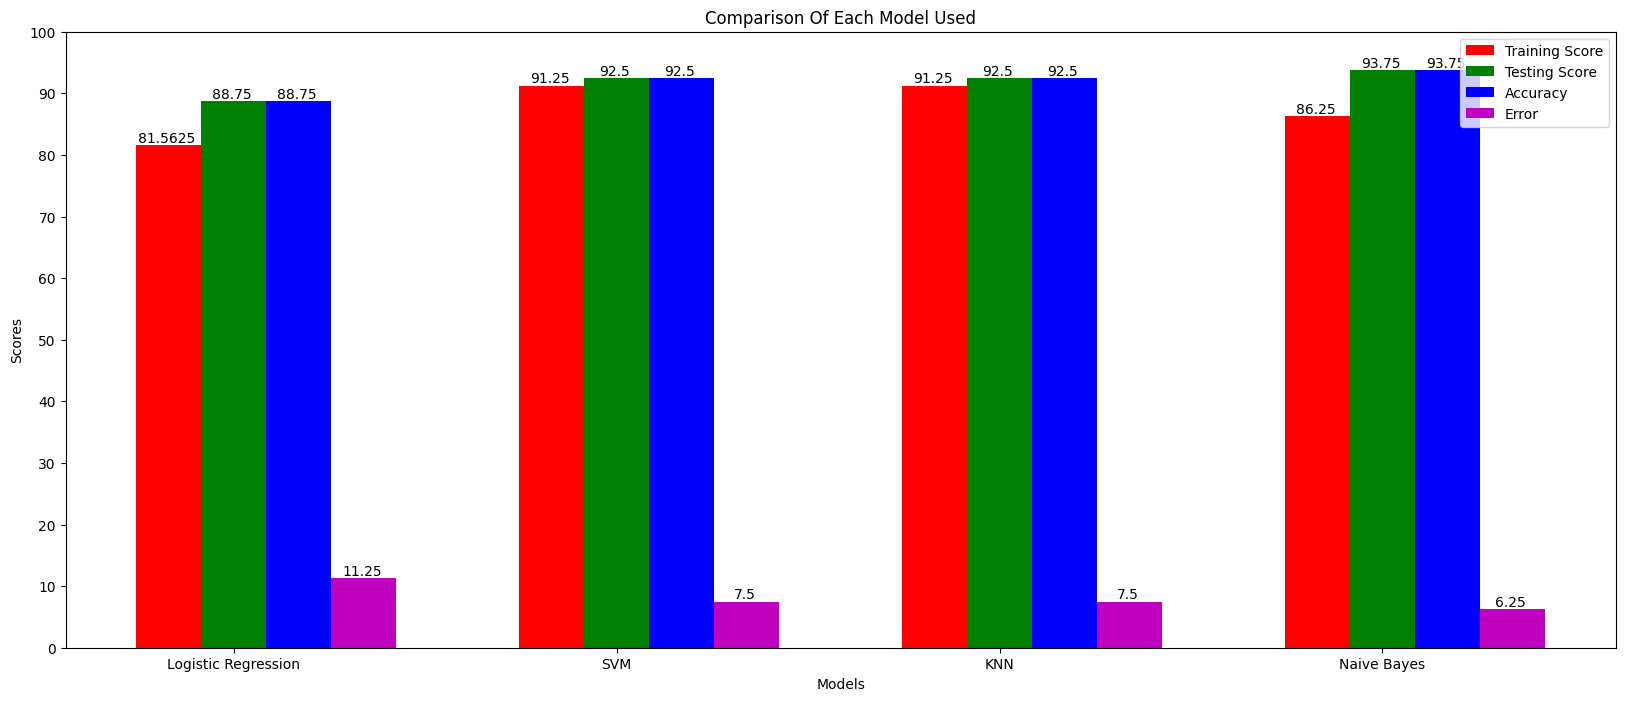

In [ ]:
models = ['Logistic Regression', 'SVM', 'KNN','Naive Bayes']
training_scores = [lr_training_score, svc_training_score, knn_training_score, gnb_training_score]
testing_scores = [lr_testing_score, svc_testing_score, knn_testing_score, gnb_testing_score]
accuracies = [lr_accuracy, svc_acc_score, knn_acc_score, gnb_accuracy]
errors = [lr_mse, svc_mse, knn_mse, gnb_mse]
data = np.array([training_scores,testing_scores,accuracies,errors])

#Graph for training score of each model

barWidth = 0.17
x = np.arange(len(models))

# define figure and axis objects
fig, ax = plt.subplots(figsize=(20, 8))

# Set position of bar on X axis
br1 = np.arange(len(training_scores))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

ax.bar(br1, training_scores, width = barWidth,color = 'r', label = 'Training Score')
ax.bar(br2, testing_scores, width = barWidth, color = 'g', label = 'Testing Score')
ax.bar(br3, accuracies, width = barWidth, color = 'b', label = 'Accuracy')
ax.bar(br4, errors, width = barWidth, color = 'm', label = 'Error')

# add text annotations to each bar
for i, j in enumerate(data):
   for x_val, y_val in zip(x, j):
      ax.annotate(str(y_val), xy=((x_val+i*barWidth-barWidth/2)+0.08, y_val), ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_xticks([r + barWidth for r in range(len(training_scores))],models)
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_ylabel('Scores')
ax.set_title('Comparison Of Each Model Used')
ax.legend()
plt.show()